<a href="https://colab.research.google.com/github/Alex112525/Neural-Networks-with-TensorFlow/blob/main/Load_multiple_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import json
import codecs
import zipfile
import requests
import numpy as np
from PIL import Image
from io import BytesIO

%matplotlib inline
import matplotlib.pyplot as plt 

#Importing our databases 

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2023-02-16 03:24:07--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  96.1MB/s    in 0.7s    

2023-02-16 03:24:08 (96.1 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [3]:
#Unzip File
local_zip = "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

#Load data in Json from cloud

Loading data from JSON format that is stored in the cloud is important for several reasons:

1. Many companies and organizations store their data in the cloud, so being able to access this data is crucial to perform their analyses.

2. JSON is a widely used format for storing data, particularly in web applications, so many datasets may be available in this format.

3. JSON is a flexible format that allows for nested data structures and is easy to read and write for both humans and machines.

In [ ]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [ ]:
data_json = []
with codecs.open(url, "rU", "utf-8") as js:
  for line in js:
    data_json.append(json.loads(line))

print(f'{len(data_json)} Elements found')

9 Elements found


In [ ]:
print(data_json[0]["label"])

b


In [ ]:
images = []

for data in data_json:
  response = requests.get(data["content"])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data["label"]])

In [ ]:
images[0][0].shape

(28, 28)

b


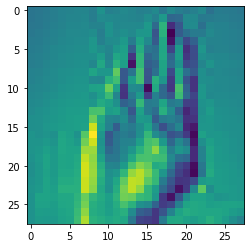

In [ ]:
plt.imshow(images[1][0])
print(images[1][1])

#Load data in Json Base64


Base64 is commonly used to encode data for transmission or storage purposes.

* Base64 encoding for storing their databases is to ensure that the data is transmitted or stored in a text-based format that can be easily read and understood by various systems, including those that do not support binary formats.

* Additionally, base64-encoded data can be more compact than its binary equivalent, which can be an advantage in cases where storage or transmission bandwidth is limited.

In [ ]:
import base64

In [ ]:
url64 = "/tmp/databasesLoadData/sign_mnist_base64/data.json"

In [ ]:
with open(url64) as f:
  data = json.load(f)

In [ ]:
data

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}

In [ ]:
base64_img_bytes = data["b"].encode("utf-8")
path_img = "/tmp/decoded_image.png"
with open(path_img, "wb") as file_to_save:
  decoded_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decoded_image_data)

In [ ]:
img = Image.open(path_img)
img

#Load data from CSV

Knowing how to import databases from CSV is important because CSV (Comma Separated Values) is a widely used file format for storing and exchanging tabular data, and many datasets are available in this format. 

Being able to load CSV files into your data analysis tools allows you to work with these datasets and perform various data analysis and modeling tasks. 

CSV files are also a common way for businesses to exchange data with partners or customers, so being able to import CSV files can be important for data integration and data sharing purposes.

In [5]:
import pandas as pd
import seaborn as sns

In [ ]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train.shape

(27455, 785)

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels = train["label"].values
labels.shape

(27455,)

In [ ]:
train.drop("label", axis=1, inplace=True)

In [ ]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
images = train.values
images.shape

(27455, 784)

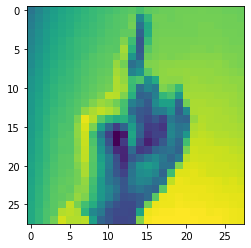

In [ ]:
plt.imshow(images[0].reshape(28, 28))